In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

In [2]:
files=['hdfc.csv','itc.csv','l&t.csv','m&m.csv','sunpha.csv','tcs.csv']
dfs=[]

for file in files:
    temp=pd.read_csv('Stocks_Data/' + file)
    temp.columns=['Date',file.replace('.csv','')]
    dfs.append(temp)

stocks = reduce(lambda left,right: pd.merge(left,right,on='Date'), dfs)
print(stocks.shape)
stocks.head()

(37, 7)


,Date,hdfc,itc,l&t,m&m,sunpha,tcs
0,June 2018,2108.05,266.05,1271.3,896.80,560.55,1847.20
1,May 2018,2136.15,271.60,1367.6,923.50,480.15,1744.80
2,Apr 2018,1944.60,281.45,1400.6,872.65,528.15,1765.70
3,Mar 2018,1891.45,255.90,1311.9,740.20,495.40,1424.65
4,Feb 2018,1883.80,265.10,1319.1,728.75,535.35,1519.13


In [3]:
def hist_return(months):
    ''' It calculates Stock returns for various months and returns a dataframe.
        Input: Months in the form of a list.
        Output: Historical returns in the form of a DataFrame. '''
    idx=[]
    df=pd.DataFrame()
    for mon in months:
        temp=(stocks.iloc[0,1:] - stocks.iloc[mon,1:])/(stocks.iloc[mon,1:])
        idx.append(str(mon)+' Month Return')
        df=pd.concat([df, temp.to_frame().T], ignore_index=True)
    df.index=idx
    return df

In [4]:
hist_stock_returns=hist_return([3,6,12,24,36])
hist_stock_returns

,hdfc,itc,l&t,m&m,sunpha,tcs
3 Month Return,0.114515,0.039664,-0.030947,0.211564,0.13151,0.296599
6 Month Return,0.125163,0.011212,0.011417,0.194062,-0.017957,0.368094
12 Month Return,0.275866,-0.178478,0.129783,0.330899,0.010911,0.562537
24 Month Return,0.792712,0.084237,0.274461,0.255179,-0.265911,0.44833
36 Month Return,0.974847,0.266844,0.069614,0.399938,-0.358785,0.447535


In [5]:
# Convert to numeric columns from Object datatypes.
print("Before Converting:")
print(hist_stock_returns.info())
cols=hist_stock_returns.columns
hist_stock_returns[cols] = hist_stock_returns[cols].apply(pd.to_numeric, errors='coerce')
print("\nAfter Converting:")
print(hist_stock_returns.info())

Before Converting:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3 Month Return to 36 Month Return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   hdfc    5 non-null      object
 1   itc     5 non-null      object
 2   l&t     5 non-null      object
 3   m&m     5 non-null      object
 4   sunpha  5 non-null      object
 5   tcs     5 non-null      object
dtypes: object(6)
memory usage: 280.0+ bytes
None

After Converting:
<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 3 Month Return to 36 Month Return
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hdfc    5 non-null      float64
 1   itc     5 non-null      float64
 2   l&t     5 non-null      float64
 3   m&m     5 non-null      float64
 4   sunpha  5 non-null      float64
 5   tcs     5 non-null      float64
dtypes: float64(6)
memory usage: 280.0+ bytes
None


In [6]:
# Calculate covariance of historical returns
cov_hist_return=hist_stock_returns.cov()

# For ease of calculations make covariance of same variable as zero.
for i in range(6):
    cov_hist_return.iloc[i][i]=0
    
cov_hist_return

,hdfc,itc,l&t,m&m,sunpha,tcs
hdfc,0.000000,0.045393,0.027916,0.024127,-0.079078,0.014362
itc,0.045393,0.000000,-0.000718,0.004381,-0.023178,-0.005554
l&t,0.027916,-0.000718,0.000000,0.002510,-0.013841,0.007330
m&m,0.024127,0.004381,0.002510,0.000000,-0.011042,0.005700
sunpha,-0.079078,-0.023178,-0.013841,-0.011042,0.000000,-0.007211
tcs,0.014362,-0.005554,0.007330,0.005700,-0.007211,0.000000


In [7]:
# Calculate the mean of historical returns
mean_hist_return=hist_stock_returns.mean()
mean_hist_return

hdfc      0.456621
itc       0.044696
l&t       0.090865
m&m       0.278328
sunpha   -0.100047
tcs       0.424619
dtype: float64

In [8]:
# Calculate Standard deviation of historical returns:
sd_hist_return=hist_stock_returns.std()
sd_hist_return

hdfc      0.400340
itc       0.159583
l&t       0.119189
m&m       0.086091
sunpha    0.204405
tcs       0.099615
dtype: float64

In [9]:
# Calculate Expected returns of portfolio.
def mean_portfolio_return(child):
    return np.sum(np.multiply(child,mean_hist_return))

#### Calculate portfolio variance.

##### var_portfolio_return:
Calculate The variance of a chromosome in population.

**Input**: A chromosome in population.

**Output**: Varience portfolio returns of a chromosome in population

The variance of a multivariable function is calculated as follows:

$$ Var(w_1X_1+w_2X_2+\dots+w_NX_N) = \sum_{i=1}^N w_i^2Var(X_i) + 2\sum_{1\leq i<j\leq N} Cov(X_i, X_j)\cdot w_i\cdot w_j$$

In [10]:
def var_portfolio_return(child):
    part_1 = np.sum(np.multiply(child,sd_hist_return)**2)
    temp_lst=[]
    vz = []
    for i in range(6):
        for j in range(i, 6):
            temp=2 * cov_hist_return.iloc[i][j] * child[i] * child[j]
            temp_lst.append(temp)
    part_2=np.sum(temp_lst)
    return part_1+part_2

In [11]:
rf= 0.0697
rf_alternative = 0.2

In [12]:
# Define fitness function
def fitness_function(child, rf = rf, lower = 1e-3):
    ''' This will return the Sharpe ratio for a particular portfolio.
        Input: A child/chromosome (1D Array)
        Output: Sharpe Ratio value (Scalar)'''
    if var_portfolio_return(child):
        return (mean_portfolio_return(child)-rf)/np.sqrt(np.max([var_portfolio_return(child), lower]))
    return 0

In [13]:
# Function used to normalize particles so that they stay in the bounds specified and maintain sum = 1
def normalize(particle, a, b):
    particle += np.min(particle) + np.random.rand()
    particle /= np.max(particle)/(b-a)
    particle += a
    while(np.sum(particle) < 1):
        particle += np.min(particle) + np.random.rand()
        particle /= np.max(particle)/(b-a)
        particle += a
    return particle/np.sum(particle)

In [14]:
def pso(cost_func, bound=[-1, 1], dim=2, population_cnt=10, w = 0.5, a = 1, b = 2, iterations = 100, rf = rf, showlog = False, lower = 1e-3):
    lower_bound = np.full((population_cnt), bound[0])
    upper_bound = np.full((population_cnt), bound[1])
    particles = np.random.uniform(bound[0], bound[1], (population_cnt, dim))
    particles = np.array(list(map(normalize, particles, lower_bound, upper_bound)))
    velocities = np.zeros((population_cnt, dim))

    best_positions = np.copy(particles)
    best_fitness = np.array([cost_func(p, rf, lower) for p in particles])
    swarm_best_position = np.copy(best_positions[np.argmax(best_fitness)])
    swarm_best_fitness = np.max(best_fitness)

    for i in range(iterations):
        r1 = np.random.uniform(0, 1, (population_cnt, dim))
        r2 = np.random.uniform(0, 1, (population_cnt, dim))
        velocities = 0.5 * velocities + a * r1 * (best_positions - particles) + b * r2 * (swarm_best_position - particles)
        particles += velocities
        particles = np.array(list(map(normalize, particles, lower_bound, upper_bound)))

        fitness_values = np.array([cost_func(p, rf, lower) for p in particles])
        # print(np.max(fitness_values))

        improved_indices = np.where(fitness_values > best_fitness)
        best_positions[improved_indices] = np.copy(particles[improved_indices])
        best_fitness[improved_indices] = np.copy(fitness_values[improved_indices])
        if np.max(fitness_values) > swarm_best_fitness:
            swarm_best_position = np.copy(particles[np.argmax(fitness_values)])
            swarm_best_fitness = np.max(fitness_values)
        if showlog:
            print('Iteration:',i)
            print('Expected returns of {} with risk of {}\n'.format(mean_portfolio_return(particles[np.argmax(fitness_values)]), var_portfolio_return(particles[np.argmax(fitness_values)])))
    return [swarm_best_position, swarm_best_fitness, var_portfolio_return(swarm_best_position), mean_portfolio_return(swarm_best_position)]

In [19]:
sol, fit, risk, ret = pso(fitness_function, bound=[-1, 1], dim=6, iterations=1000, population_cnt=20, showlog = True)

Iteration: 0
Expected returns of 0.22527126998728544 with risk of 0.0014286464614800716

Iteration: 1
Expected returns of 0.2458730604111457 with risk of 0.0018742476728207747

Iteration: 2
Expected returns of 0.2185143202113018 with risk of 0.0012150956299886609

Iteration: 3
Expected returns of 0.19977117814554865 with risk of 0.001013355056350554

Iteration: 4
Expected returns of 0.18625872329642848 with risk of 0.000929519247254592

Iteration: 5
Expected returns of 0.2125684368370402 with risk of 0.002102082581076588

Iteration: 6
Expected returns of 0.41386366388540247 with risk of 0.007181099138271869

Iteration: 7
Expected returns of 0.21361011790942977 with risk of 0.0010733308956817566

Iteration: 8
Expected returns of 0.22160785092845936 with risk of 0.0011709673452812352

Iteration: 9
Expected returns of 0.17908339243050947 with risk of 0.0005684068231286382

Iteration: 10
Expected returns of 0.18558141592550254 with risk of 0.0093376592057884

Iteration: 11
Expected returns

In [20]:
print('Portfolio of stocks:')
for i in list(range(6)):
    print(hist_stock_returns.columns[i],':',sol[i]) 
print('\nExpected returns of ', ret, "with risk of ", risk, "and fitness ", fit)

Portfolio of stocks:
hdfc : -0.04815955115252284
itc : 0.23541526589597772
l&t : -0.02301012459815807
m&m : 0.26018184977080455
sunpha : 0.1556187900668507
tcs : 0.4199537700170479

Expected returns of  0.22160785092845936 with risk of  0.0011709673452812352 and fitness  4.439231849471063


In [15]:
parameters = [(rf, -1, 1, 1e-3), (rf, 0, 1, 1e-3), (rf_alternative, -1, 1, 1e-3), (rf_alternative, 0, 1, 1e-3), (rf, -1, 1, 1e-4), (rf, 0, 1, 1e-4), (rf_alternative, -1, 1, 1e-4), (rf_alternative, 0, 1, 1e-4)]
solutions = np.reshape([[pso(fitness_function, bound=[x[1], x[2]], dim=6, iterations=100, population_cnt=20, rf = x[0], lower = x[3])[2:] for _ in range(50)] for x in parameters], (8,50,2))

In [ ]:
# Use this cell instead of the one above to quickly render the plots
parameters = [(rf, -1, 1, 1e-3), (rf, 0, 1, 1e-3), (rf_alternative, -1, 1, 1e-3), (rf_alternative, 0, 1, 1e-3), (rf, -1, 1, 1e-4), (rf, 0, 1, 1e-4), (rf_alternative, -1, 1, 1e-4), (rf_alternative, 0, 1, 1e-4)]
s = [[[ 0.002258756843421743 ,  0.2739526559269245 ], [ 0.0015917135903674075 ,  0.2544344293622286 ], [ 0.001203117232844473 ,  0.20738678669880484 ], [ 0.0033898411518406358 ,  0.3446783077965124 ], [ 0.003711768130307153 ,  0.268255494199608 ], [ 0.007087342715324996 ,  0.3715016346507823 ], [ 0.004019204655404444 ,  0.3231355474622791 ], [ 0.009669307316560807 ,  0.415318089708744 ], [ 0.008292820505630655 ,  0.42287770522180956 ], [ 0.0012815175242936044 ,  0.2307431473146066 ], [ 0.0034760678278440097 ,  0.32299488953777766 ], [ 0.001526073610416125 ,  0.247459156740669 ], [ 0.002015203922985362 ,  0.263992898987461 ], [ 0.00951862838792564 ,  0.4594697365861786 ], [ 0.0013189526268544485 ,  0.22254482279361504 ], [ 0.002278535746551501 ,  0.26580021294512785 ], [ 0.009434195211133764 ,  0.4192125455081471 ], [ 0.0012115728427286054 ,  0.2134589709457044 ], [ 0.0012338367049435986 ,  0.24017855410786842 ], [ 0.0019317484048402929 ,  0.2670299658164202 ], [ 0.021432353412506048 ,  0.545715046040333 ], [ 0.0012559243916604578 ,  0.2271674454645248 ], [ 0.006453881524295115 ,  0.37470413054420687 ], [ 0.011673061344502113 ,  0.43585436509518893 ], [ 0.0014459546148624762 ,  0.23454063341423567 ], [ 0.0016859553203287829 ,  0.24078449751656333 ], [ 0.008680241579067566 ,  0.40345443253551627 ], [ 0.002933901258822154 ,  0.2930894138683499 ], [ 0.002117338258648822 ,  0.27082056457499754 ], [ 0.005184504135117621 ,  0.34999116084465715 ], [ 0.004301426061301451 ,  0.2759455555802215 ], [ 0.01258941933830051 ,  0.468220358947902 ], [ 0.0026984466450526235 ,  0.2835900106400535 ], [ 0.004112457583952766 ,  0.30323745750721376 ], [ 0.0015447009785055999 ,  0.23995761944210509 ], [ 0.0008586242285986674 ,  0.21394166989347171 ], [ 0.006885467874868224 ,  0.41227757310726565 ], [ 0.01203102680148106 ,  0.43710281118619865 ], [ 0.0012075434239830316 ,  0.20899908671766698 ], [ 0.0013150748475724266 ,  0.22160949061213664 ], [ 0.0038678618469923727 ,  0.3111827277292343 ], [ 0.0066615385607618136 ,  0.39268594427048165 ], [ 0.025534355774420533 ,  0.5787891967842449 ], [ 0.0014633875346620282 ,  0.22977698422662818 ], [ 0.003115009089847828 ,  0.30806720408123067 ], [ 0.0018434464234118077 ,  0.26908705994615373 ], [ 0.0038861908846609073 ,  0.2867229969914189 ], [ 0.002535473817157522 ,  0.27095597331984195 ], [ 0.005626573462817255 ,  0.35003256929843407 ], [ 0.0015344036840897208 ,  0.26238355572919025 ]], 
[[ 0.0027060855922693 ,  0.3251326617826506 ], [ 0.0011264634053523084 ,  0.28402516833127966 ], [ 0.0014539862548289297 ,  0.30668555956916277 ], [ 0.0012866625368917663 ,  0.23894377213976548 ], [ 0.0011910398614438274 ,  0.28344537746343945 ], [ 0.001789924276900604 ,  0.26652567071187677 ], [ 0.008957445722850739 ,  0.4085712997714891 ], [ 0.002231231704879974 ,  0.31637947597007726 ], [ 0.0017625101710019506 ,  0.2773880135158158 ], [ 0.002278639734859759 ,  0.29934861114795547 ], [ 0.0027595509819919265 ,  0.30304369904479544 ], [ 0.0012632192975356431 ,  0.2691960042845431 ], [ 0.004231497956832371 ,  0.36218928726245025 ], [ 0.0009950746058830576 ,  0.28436559470702916 ], [ 0.001293500241879287 ,  0.2783640797927494 ], [ 0.0015788508687193115 ,  0.2647320670522009 ], [ 0.0028935655244862295 ,  0.3410812739176626 ], [ 0.008832501808331714 ,  0.4485529148584289 ], [ 0.0037048839003135155 ,  0.3477357153420763 ], [ 0.0029723548444110523 ,  0.339599781242808 ], [ 0.0013368847697762462 ,  0.2574496898802353 ], [ 0.00302765727948224 ,  0.32225173524311346 ], [ 0.003567184736051301 ,  0.3497066513839399 ], [ 0.006996816309492929 ,  0.4317581220036981 ], [ 0.0011320373160140333 ,  0.24517030482570512 ], [ 0.0020904728334626603 ,  0.29092086837977965 ], [ 0.0012518892391191576 ,  0.27894084582720413 ], [ 0.0036498326685892772 ,  0.33322350164661035 ], [ 0.0038264292338232708 ,  0.34425798059637425 ], [ 0.0014988865430616395 ,  0.23752322766077288 ], [ 0.0015922151284478272 ,  0.2519900535022442 ], [ 0.003111880943768122 ,  0.32253703972640174 ], [ 0.0010139298981242419 ,  0.2629266318462411 ], [ 0.002291576934788853 ,  0.28252100743721376 ], [ 0.0012590188950466407 ,  0.2505554673521468 ], [ 0.0024356355834791316 ,  0.3320577916903174 ], [ 0.004733017268852908 ,  0.36981455074516867 ], [ 0.001035781064696411 ,  0.2139589884968409 ], [ 0.0011930002134443105 ,  0.2900535255740759 ], [ 0.006569023090062838 ,  0.4246225752003988 ], [ 0.0011498120987712321 ,  0.20085166372245877 ], [ 0.000991420858666943 ,  0.28736766949989334 ], [ 0.0053002533451569234 ,  0.3987188574390395 ], [ 0.0031037454785592666 ,  0.35238630461807907 ], [ 0.0012896779764990235 ,  0.2953372044705172 ], [ 0.0009681543673286091 ,  0.2742128287469916 ], [ 0.004211910463104143 ,  0.36058085589006555 ], [ 0.016623948950424922 ,  0.5527947278340846 ], [ 0.0013011286140343038 ,  0.26744445765186736 ], [ 0.00570699232457594 ,  0.4075466742449272 ]], 
[[ 0.032561385874267185 ,  0.4334233424518997 ], [ 0.014227762204899727 ,  0.3904915571346931 ], [ 0.10788118096614316 ,  0.7011450496558551 ], [ 0.09132273729726557 ,  0.4606153160057178 ], [ 0.017344821676028632 ,  0.4883721026639872 ], [ 0.152187395077891 ,  0.7754280881690385 ], [ 0.032048982355476666 ,  0.4785239565820584 ], [ 0.03471319444307875 ,  0.4581651673358854 ], [ 0.01213758462775594 ,  0.4329198922170013 ], [ 0.05593977011181174 ,  0.5380334287833073 ], [ 0.013057802951620408 ,  0.388779679736022 ], [ 0.108315829183234 ,  0.6000961678952224 ], [ 0.03424257914763394 ,  0.46199870319897857 ], [ 0.011451985431614367 ,  0.47091611643132447 ], [ 0.014873579133620756 ,  0.46869279119326057 ], [ 0.01694187880210005 ,  0.4939446246518787 ], [ 0.01318959608952644 ,  0.43316769440170616 ], [ 0.08492215962404809 ,  0.5228778173011069 ], [ 0.013077936727028736 ,  0.4126772789972585 ], [ 0.012789926703355152 ,  0.49198070024049034 ], [ 0.03873416062988056 ,  0.5522711754255877 ], [ 0.013908749909869914 ,  0.4676769766457246 ], [ 0.03611796291444024 ,  0.5552511654147763 ], [ 0.05944881532533932 ,  0.488859709596829 ], [ 0.07845174088261161 ,  0.811511297017576 ], [ 0.16735864153279495 ,  0.7898577618454605 ], [ 0.011452626717966282 ,  0.4317618868296337 ], [ 0.012772452040113673 ,  0.41242122404516013 ], [ 0.013790385407164435 ,  0.4490761690485551 ], [ 0.03892317984632229 ,  0.6200954804354697 ], [ 0.29874750780736076 ,  1.0248157447220345 ], [ 0.03464677176779728 ,  0.5794868766272029 ], [ 0.029334535486525183 ,  0.5896071280722515 ], [ 0.025690071760861345 ,  0.4742354299588529 ], [ 0.028722775932871286 ,  0.5149130378659893 ], [ 0.027303464030960886 ,  0.5978650705235021 ], [ 0.028205078093115975 ,  0.48866368985379205 ], [ 0.04338576250034709 ,  0.4903094822625195 ], [ 0.01325941494868312 ,  0.4496613962300419 ], [ 0.057030031932235964 ,  0.6158976727370971 ], [ 0.051886353395328336 ,  0.6251133273958556 ], [ 0.01380761415299032 ,  0.4074329793576136 ], [ 0.012584358864383435 ,  0.4153362378756443 ], [ 0.08452452344955312 ,  0.7563981254728824 ], [ 0.04582537599855262 ,  0.5277487210502015 ], [ 0.16989015253555717 ,  0.5307144169558293 ], [ 0.042537956051843386 ,  0.582169418150525 ], [ 0.06455317404461365 ,  0.5336913279195437 ], [ 0.06308558038365697 ,  0.5745194426471029 ], [ 0.08000258897691381 ,  0.5082556092340627 ]], 
[[ 0.00812104536111925 ,  0.4390490371410293 ], [ 0.017547409310689543 ,  0.535111961885793 ], [ 0.03159663062956464 ,  0.5627264286414959 ], [ 0.010723642972104992 ,  0.4900385335454647 ], [ 0.012851594549005927 ,  0.48349740981126643 ], [ 0.014930014089971234 ,  0.5264108992223944 ], [ 0.019561924162390526 ,  0.5638896362253046 ], [ 0.03648792930715633 ,  0.43466276144425314 ], [ 0.11165625553824887 ,  0.7977261332607434 ], [ 0.013206436269901683 ,  0.5152060886406026 ], [ 0.010152113766909571 ,  0.45889188234291794 ], [ 0.011629288454600959 ,  0.46305612559663456 ], [ 0.02831380036618605 ,  0.6182896588533687 ], [ 0.03747687526016257 ,  0.6696781072421102 ], [ 0.019597540166183314 ,  0.5730142804304179 ], [ 0.04018273721094104 ,  0.6439525040610355 ], [ 0.022281725086502897 ,  0.5522887281227727 ], [ 0.019124623285557515 ,  0.5823752316161181 ], [ 0.1522424505522742 ,  0.8458781177720092 ], [ 0.011651739880304823 ,  0.4950645832745832 ], [ 0.014647181672477205 ,  0.5274235760555053 ], [ 0.011358498136487252 ,  0.48078201306234486 ], [ 0.015222490852956258 ,  0.46899971661828643 ], [ 0.007639832568678613 ,  0.43962568305243566 ], [ 0.012384102772308515 ,  0.4856611491133164 ], [ 0.011247386649392503 ,  0.4728524825414556 ], [ 0.02224810357504346 ,  0.6076963150889546 ], [ 0.21372072521684793 ,  0.6539952489714351 ], [ 0.15334881367494396 ,  0.7013904731795415 ], [ 0.01243041111869611 ,  0.42104203101423743 ], [ 0.015538788355294415 ,  0.4816856993751889 ], [ 0.01898535866895058 ,  0.5634921760818354 ], [ 0.010259095007830097 ,  0.47472802898581984 ], [ 0.0076203225870910525 ,  0.43239197746973057 ], [ 0.0067867443286742015 ,  0.4353053588703317 ], [ 0.014678994526705862 ,  0.5057234163245173 ], [ 0.02094027085342859 ,  0.5880248175557387 ], [ 0.041281881807185054 ,  0.5009257581943174 ], [ 0.1243996510785754 ,  0.48758925625176874 ], [ 0.04278734462506397 ,  0.4730906765547382 ], [ 0.0078011090031595365 ,  0.4347748307936688 ], [ 0.014393142212687466 ,  0.48263418645022194 ], [ 0.014876102557837056 ,  0.4989034469907747 ], [ 0.016585989299796627 ,  0.5129359053521257 ], [ 0.0583362402677092 ,  0.7155403446777111 ], [ 0.01800631539121174 ,  0.5230558691796844 ], [ 0.006173979661746246 ,  0.41236140777740266 ], [ 0.17509223926467984 ,  0.7401412914923112 ], [ 0.01448000613218431 ,  0.5153171842629325 ], [ 0.00915807821020486 ,  0.46437909591010373 ]], 
[[ 0.007000688740068353 ,  0.37354667363555666 ], [ 0.0002018984006225931 ,  0.1684287987607779 ], [ 0.010844449781157102 ,  0.43611963158608574 ], [ 0.007300134686541941 ,  0.3401439286896312 ], [ 0.0013776336999653006 ,  0.2446276889398257 ], [ 0.00489268822390568 ,  0.345002338561048 ], [ 0.0022578761002344863 ,  0.2879036337571518 ], [ 0.005184550600298862 ,  0.38841179311300233 ], [ 0.0007067353281688836 ,  0.20391058374231358 ], [ 0.0004455527752601834 ,  0.19252857944422444 ], [ 0.0014843231699481737 ,  0.2395386034348467 ], [ 0.0003261126687325016 ,  0.1746246580672787 ], [ 0.0026692365010726063 ,  0.26576172348410976 ], [ 0.0007797877054074561 ,  0.19027480742216374 ], [ 0.0009146598312941862 ,  0.21344266534590123 ], [ 0.001664291339008318 ,  0.26132188446107096 ], [ 0.0012115794861851164 ,  0.24589968175430926 ], [ 0.00015136333488661308 ,  0.1616222128369825 ], [ 0.001483133233770347 ,  0.2474691393361077 ], [ 0.0010524676690798545 ,  0.21466188674432868 ], [ 0.0009321989161388215 ,  0.23349381184599965 ], [ 9.443687293019497e-05 ,  0.1284181127618268 ], [ 0.0006107439434664868 ,  0.1977380302128874 ], [ 0.017694950332423187 ,  0.5505160730207713 ], [ 0.0026608832113403404 ,  0.2917614184560717 ], [ 0.005855511382595871 ,  0.38166065551709716 ], [ 0.001961002821871666 ,  0.2401260297727682 ], [ 0.0013865142415835849 ,  0.23938253224214445 ], [ 0.0013139090607802153 ,  0.22169424549907465 ], [ 0.0004657928759255322 ,  0.18225592080816588 ], [ 0.003577105026036703 ,  0.33546593966588584 ], [ 0.0010403454338824515 ,  0.21844665338117325 ], [ 0.004934673545425174 ,  0.35690351068492604 ], [ 0.00021871266803008375 ,  0.16215309282233364 ], [ 0.00023890117016245067 ,  0.13546439505888308 ], [ 0.0021497653313083597 ,  0.24377873738262973 ], [ 0.008195668760282406 ,  0.36806346858375333 ], [ 0.007109366065532556 ,  0.4136095427788 ], [ 0.00021529896054651044 ,  0.14783396832170748 ], [ 0.0038269929990190337 ,  0.3268010620557614 ], [ 0.01033509792438149 ,  0.4109676019870529 ], [ 0.0009144123300609177 ,  0.23619992461628866 ], [ 0.0026679706461078655 ,  0.29120071313853235 ], [ 0.0026376066368512963 ,  0.28793341977236275 ], [ 0.0007809559823752136 ,  0.18702113192807415 ], [ 0.01197408584006399 ,  0.4432431786669331 ], [ 0.0003427242040014806 ,  0.1704946301138938 ], [ 0.0023500784631396883 ,  0.292244402000534 ], [ 0.00067316633788095 ,  0.2035077801104445 ], [ 0.0023282275952258725 ,  0.26210536565408277 ]], 
[[ 0.0001090674893979137 ,  0.1468387731846444 ], [ 0.002410684123635591 ,  0.32273980890767634 ], [ 0.0018000550549549018 ,  0.26001545555469147 ], [ 0.00013296990004013458 ,  0.17953125550423665 ], [ 0.0022441486453440157 ,  0.3257206467849045 ], [ 0.00019839712989489985 ,  0.2062727803267977 ], [ 0.0003912509887618928 ,  0.23175945219675537 ], [ 0.00021473624667851885 ,  0.16369277660608794 ], [ 0.00010236192022048361 ,  0.17135657310949462 ], [ 0.0034615619481699715 ,  0.33419190167049323 ], [ 0.0033877498724008068 ,  0.3580052967074032 ], [ 0.005622500542328875 ,  0.40915743909727276 ], [ 0.00044689348814365426 ,  0.20257208732685544 ], [ 0.0005065918610656882 ,  0.1458261367399083 ], [ 0.00016405858523960235 ,  0.16132004681000714 ], [ 0.0025623845610904614 ,  0.2964662018538393 ], [ 0.0037173231451538835 ,  0.3632712950179573 ], [ 0.004025336512556869 ,  0.3724516592613291 ], [ 0.003234102470839783 ,  0.3323794389914977 ], [ 0.0014741384082825409 ,  0.2365149022193933 ], [ 0.0015107147740530055 ,  0.28056989874366034 ], [ 0.0015957738424180372 ,  0.2564113644906171 ], [ 0.00027676399591256267 ,  0.15542702267645406 ], [ 9.740778829725807e-05 ,  0.15201127455626087 ], [ 0.0023519766299019175 ,  0.28941107526870147 ], [ 0.005277829957679784 ,  0.4020090085922425 ], [ 0.00017523719072198504 ,  0.1826863382359919 ], [ 0.00027719928640920505 ,  0.1666554129244909 ], [ 0.001635872813836499 ,  0.2579970959660711 ], [ 0.005954770589066835 ,  0.4086733952976532 ], [ 0.0033955075267853643 ,  0.34443920649674564 ], [ 0.0028091080985962052 ,  0.32815373655570995 ], [ 0.00014719159087578024 ,  0.14345939471730482 ], [ 0.0034719806644401144 ,  0.33718803309804596 ], [ 0.004196882489141107 ,  0.35823195985916084 ], [ 0.0009098716760741737 ,  0.2464371992458385 ], [ 0.00012722831219743203 ,  0.1350167607224924 ], [ 0.0003002233470090418 ,  0.21774928604990432 ], [ 0.004709504185192073 ,  0.39398013799618614 ], [ 0.00021172894652623717 ,  0.21301153983361376 ], [ 0.003017143995932524 ,  0.35711974515240485 ], [ 0.004420262947963364 ,  0.3559927613187088 ], [ 9.591124559020937e-05 ,  0.12705662892164707 ], [ 0.00021429207826661328 ,  0.19875865835663994 ], [ 0.0003332418469066314 ,  0.16128501548293542 ], [ 0.0002063763875066191 ,  0.15107853453102707 ], [ 0.004596704963491955 ,  0.3600919096449691 ], [ 0.0007272485262720327 ,  0.24771753601264807 ], [ 0.00016120196785803127 ,  0.14056630977221507 ], [ 0.0005051900562240332 ,  0.19156559599925624 ]], 
[[ 0.01939750784211055 ,  0.3395471193650631 ], [ 0.040652527778825595 ,  0.46007025651652844 ], [ 0.011743589133897031 ,  0.46332973883167794 ], [ 0.011697103706203115 ,  0.3699229952658448 ], [ 0.053973294330196965 ,  0.5248729271379302 ], [ 0.018294357294519156 ,  0.46530958217427 ], [ 0.03880613441783812 ,  0.5669424471653566 ], [ 0.009681588478319673 ,  0.4315586575023565 ], [ 0.02157110216043762 ,  0.4805462850712071 ], [ 0.10175705060423125 ,  0.5967444888573201 ], [ 0.018692875954347276 ,  0.46779434953809995 ], [ 0.02048551531635797 ,  0.5149363627478868 ], [ 0.10743014045110526 ,  0.7206387841232017 ], [ 0.01727396041315625 ,  0.36560513808009504 ], [ 0.010336570885840822 ,  0.43697672419130335 ], [ 0.03114748647567112 ,  0.5766615233219192 ], [ 0.08379451851039149 ,  0.7492468957885862 ], [ 0.08408801904659603 ,  0.5398648786260655 ], [ 0.04666885177157673 ,  0.45321616993636593 ], [ 0.00464160705689357 ,  0.34628703751671747 ], [ 0.16513110403637984 ,  0.765819784620035 ], [ 0.0741736596061169 ,  0.6835977129952754 ], [ 0.02369467587502368 ,  0.45654907503843634 ], [ 0.02834103551950435 ,  0.42498074030920635 ], [ 0.05455772404740735 ,  0.4979129203581296 ], [ 0.11035149950754915 ,  0.6921243863189196 ], [ 0.05317744274632011 ,  0.5251436483347657 ], [ 0.43541123267362486 ,  0.993672273643795 ], [ 0.08405333272245735 ,  0.5157143159515358 ], [ 0.05442558764532318 ,  0.5722958312266769 ], [ 0.03738593843041921 ,  0.5195923644602651 ], [ 0.027924669089013154 ,  0.4521632234029129 ], [ 0.194265738050903 ,  0.8667787533169085 ], [ 0.010162514285101752 ,  0.4020971494730191 ], [ 0.011051618561961789 ,  0.4434851337420497 ], [ 0.01831962441253886 ,  0.4874458763401046 ], [ 0.011288368386239318 ,  0.4019551210909399 ], [ 0.01723771680769435 ,  0.4896712162422395 ], [ 0.009556840053492173 ,  0.41648327742082336 ], [ 0.005275039215617167 ,  0.35372630298792085 ], [ 0.010275517230766761 ,  0.3672136597243159 ], [ 0.027176718038063027 ,  0.49628358121752214 ], [ 0.03830937781596546 ,  0.5269039540886444 ], [ 0.022214307987404827 ,  0.5481278327682694 ], [ 0.021354497446747098 ,  0.4930017463595092 ], [ 0.05336895060744193 ,  0.6106074093547408 ], [ 0.0371849498405321 ,  0.6172748250082092 ], [ 0.06253180202311737 ,  0.6091411311666955 ], [ 0.008048121926949647 ,  0.3820716771789958 ], [ 0.052873188838309056 ,  0.6427656305443603 ]], 
[[ 0.04133960577905162 ,  0.7215578968144303 ], [ 0.007425591563744528 ,  0.4276872167669531 ], [ 0.02640625215873301 ,  0.633959023940277 ], [ 0.011724357226601123 ,  0.46702753273040865 ], [ 0.0364449716976581 ,  0.38194793029249796 ], [ 0.012256222352237507 ,  0.49483418140146174 ], [ 0.022572470592249573 ,  0.4891195855049857 ], [ 0.009117583541961178 ,  0.44821010086093316 ], [ 0.01011364984456684 ,  0.4571461153498358 ], [ 0.016334577249850032 ,  0.5447586274571627 ], [ 0.02681964567340394 ,  0.6276719324263366 ], [ 0.017646797815508986 ,  0.5406857305696303 ], [ 0.0182432904316202 ,  0.5622851765813467 ], [ 0.019321810405567536 ,  0.5739195660939241 ], [ 0.015704835507724772 ,  0.45656004037668857 ], [ 0.018184764707483782 ,  0.548935630669 ], [ 0.009484820626237381 ,  0.4550373513061605 ], [ 0.00802359948532911 ,  0.4376467167296173 ], [ 0.006384371267057123 ,  0.43010299073233305 ], [ 0.013489930509186206 ,  0.4958930539537951 ], [ 0.026010180375842677 ,  0.5595394437508153 ], [ 0.02419989099973452 ,  0.5832955894069383 ], [ 0.012963935026719626 ,  0.4807267490561691 ], [ 0.016966605595494386 ,  0.5403568080617502 ], [ 0.011720613146991974 ,  0.47445317697077194 ], [ 0.012460597422731114 ,  0.44660189446470555 ], [ 0.010648835816668607 ,  0.4579690907754158 ], [ 0.018774867026892076 ,  0.5636591570149428 ], [ 0.012446226589175996 ,  0.48589750546232974 ], [ 0.020771226304870924 ,  0.59652468884711 ], [ 0.013566949557387867 ,  0.49930100786518794 ], [ 0.011446019323883578 ,  0.4636826440815496 ], [ 0.09532397684031088 ,  0.7499859650972787 ], [ 0.008699253494498111 ,  0.4545766147429116 ], [ 0.012332715047416173 ,  0.49746243584825345 ], [ 0.2005145755933207 ,  0.8497062072088717 ], [ 0.01222456077758442 ,  0.5034426923635036 ], [ 0.007960425672172672 ,  0.43672481840559985 ], [ 0.09894386937335023 ,  0.574253827877377 ], [ 0.00917814372709672 ,  0.442640743195473 ], [ 0.02988735221488533 ,  0.6260751663625915 ], [ 0.01300608546763351 ,  0.4673750577471676 ], [ 0.1953090995872132 ,  0.8673851060078602 ], [ 0.029543380521191 ,  0.6241229036313936 ], [ 0.015928886456160914 ,  0.4545036878220331 ], [ 0.008246865811325912 ,  0.4515740168365947 ], [ 0.03327221747672059 ,  0.5495974827943546 ], [ 0.01602053884263991 ,  0.5417718514427411 ], [ 0.006794930339003827 ,  0.4324457911471978 ], [ 0.006464574897899429 ,  0.41621640929609083 ]]]
solutions = np.reshape(s, (8,50,2))

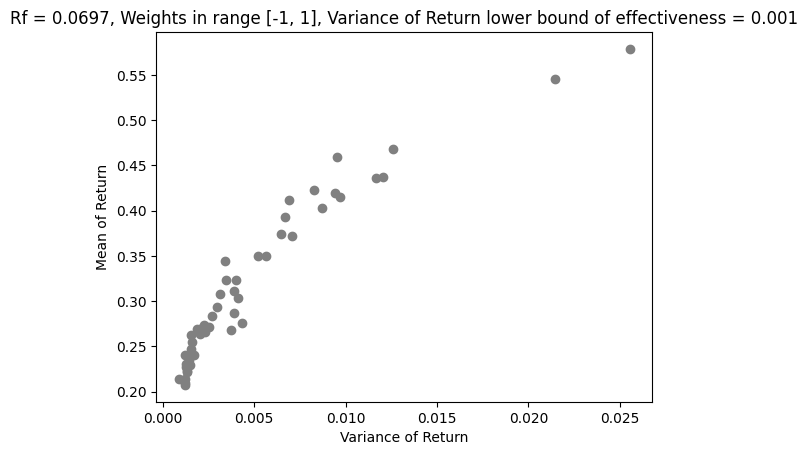

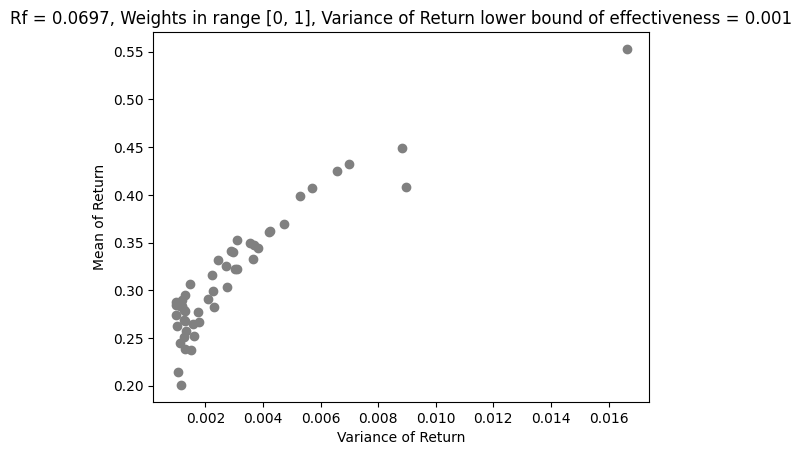

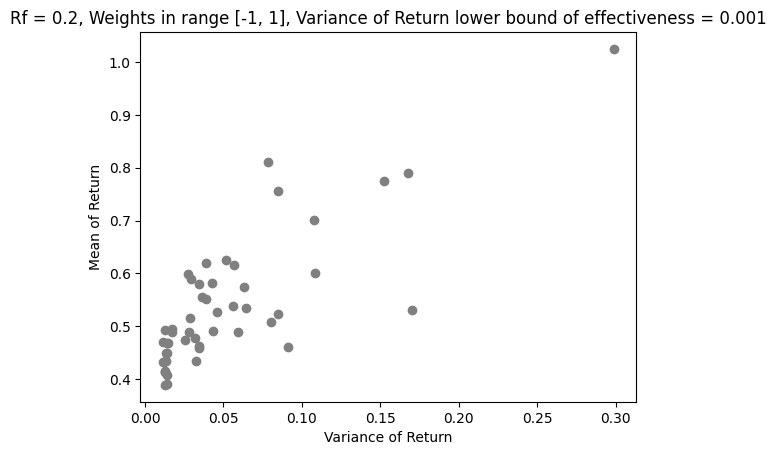

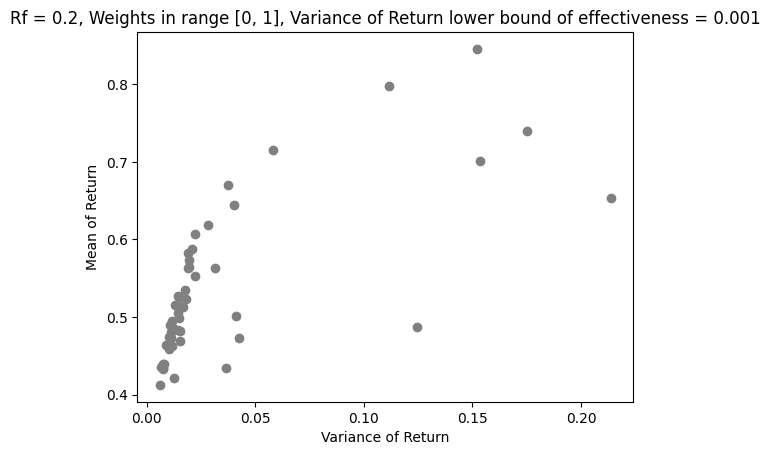

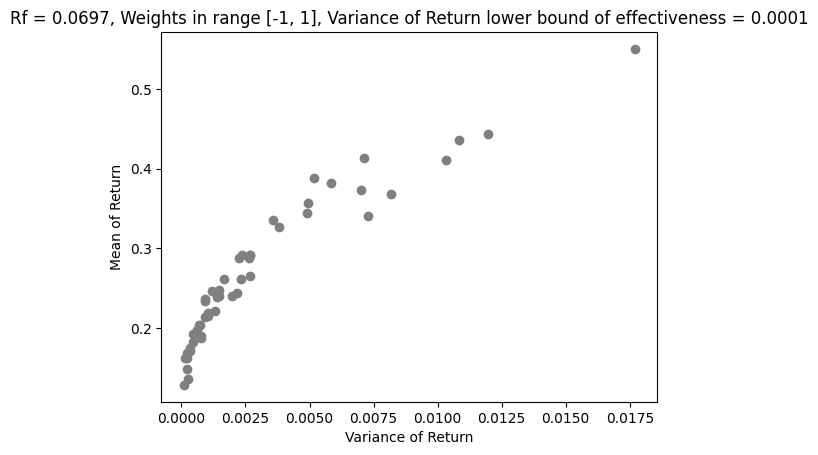

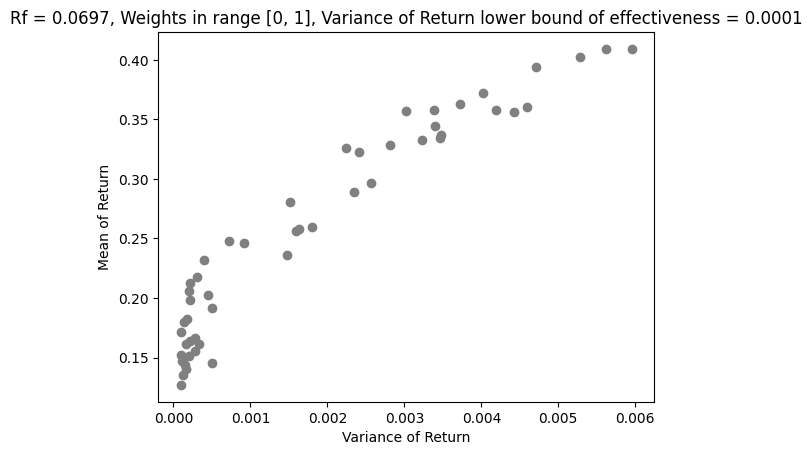

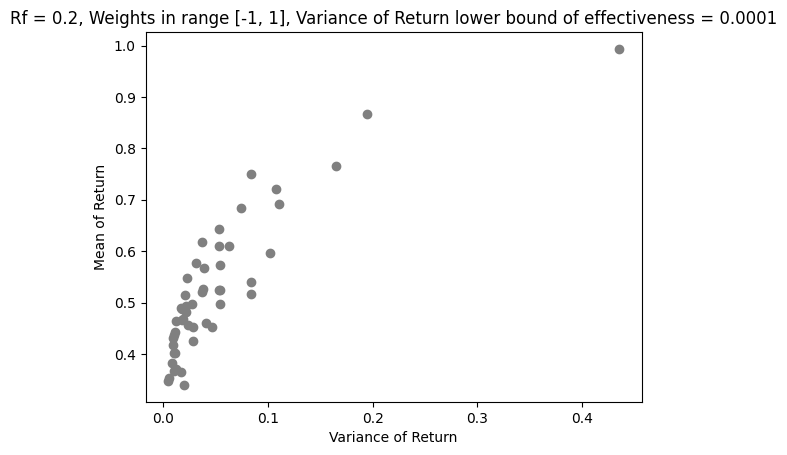

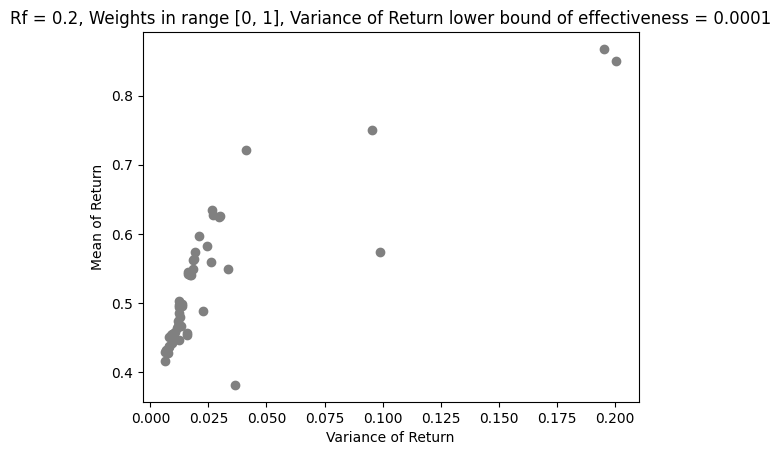

In [16]:
for i in range(8):
    plt.figure()
    plt.xlabel("Variance of Return")
    plt.ylabel("Mean of Return")
    plt.title('Rf = {}, Weights in range [{}, {}], Variance of Return lower bound of effectiveness = {}'.format(parameters[i][0], parameters[i][1], parameters[i][2], parameters[i][3]))
    plt.scatter(solutions[i][:,0], solutions[i][:,1], color = 'grey')
plt.show()